In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches
from scipy.stats import ttest_ind, ttest_1samp, ttest_rel
import matplotlib as mpl

In [140]:
# mpl.rcParams['font.family'] = 'Avenir'
plt.rc('font', family='Helvetica')
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['figure.figsize'] = (10.0, 7.0)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
sns.set_palette("Dark2")

In [129]:
drug_score = pd.read_csv("../../data/drug/final_drug_scores.tsv", sep="\t")
drug_list = drug_score[
    (drug_score['MultiDrug_correlation'] > 0.4) & (drug_score['sensitive_count'] > 20)][
    'drug_id'].values
drug_list_sensitive = drug_score[(drug_score['sensitive_count'] > 20)][
    'drug_id'].values

# pc as covariate

In [11]:
df = pd.read_csv("../../result_files/lm/lm_sklearn_protein_drug.csv.gz")

In [77]:
df = df[df['drug_id'].isin(drug_list)]

In [78]:
df.head()

,y,x,n,b,lr,covs,pval,fdr,drug_id
0,1079;Dasatinib;GDSC2,ITGB1,954,-0.429266,147.705084,33,5.502991e-34,5.502991e-34,1079
1,1047;Nutlin-3a (-);GDSC2,FDXR,931,-0.284766,142.672235,33,6.932594e-33,1.386519e-32,1047
2,1034;Staurosporine;GDSC2,ITGB1,959,-0.357633,125.121602,33,4.786951e-29,4.786951e-29,1034
3,1374;Dabrafenib (1373) + Trametinib (1372);GDSC1,ITGB1,835,-0.412517,119.561605,32,7.890637e-28,7.890637e-28,1374
4,1079;Dasatinib;GDSC2,PLEC,960,-0.385637,110.469601,33,7.732208e-26,7.732208e-26,1079


In [79]:
df[df['x']=='VTN']

,y,x,n,b,lr,covs,pval,fdr,drug_id
164,1006;Cytarabine;GDSC1,VTN,813,0.264965,57.861142,33,2.812892e-14,2.812892e-14,1006
186,1386;Doxorubicin;GDSC1,VTN,808,0.245932,56.277874,33,6.291949e-14,6.291949e-14,1386
215,1459;PARP_0108;GDSC1,VTN,804,0.235806,54.175991,33,1.833130e-13,1.833130e-13,1459
322,1460;PARP_9482;GDSC1,VTN,801,0.231830,49.630531,33,1.856028e-12,1.856028e-12,1460
488,1393;Gemcitabine;GDSC1,VTN,806,0.223981,45.102631,33,1.869740e-11,1.869740e-11,1393
...,...,...,...,...,...,...,...,...,...
2657132,1966;KIT_6754;GDSC2,VTN,639,0.001049,0.000965,31,9.752227e-01,9.752227e-01,1966
2661628,104;Bortezomib;GDSC1,VTN,353,0.001560,0.000795,31,9.775068e-01,9.775068e-01,104
2695555,1059;AZD8055;GDSC1,VTN,806,0.000219,0.000039,33,9.949856e-01,9.949856e-01,1059
2703340,461;NSC319726;GDSC1,VTN,757,-0.000044,0.000001,33,9.990435e-01,9.990435e-01,461


In [80]:
df[df['fdr']<0.05].groupby(['x'])['fdr'].mean().sort_values().head(10)

x
PLEC      0.006754
ITGB1     0.007131
VIM       0.007236
LGALS1    0.007466
PDLIM7    0.007728
BSG       0.007871
LMNA      0.007996
GNAI2     0.008020
AHNAK     0.008439
CRTAP     0.008462
Name: fdr, dtype: float64

In [82]:
df[df['fdr']<0.05].groupby(['x'])['b'].mean().sort_values().tail(10)

x
CEACAM5    0.146824
FABP4      0.154045
CRYAB      0.160818
SORBS2     0.163474
UGT1A6     0.165285
MCL1       0.179487
GFRA2      0.189148
GPA33      0.189306
SCG3       0.202088
TPPP3      0.211735
Name: b, dtype: float64

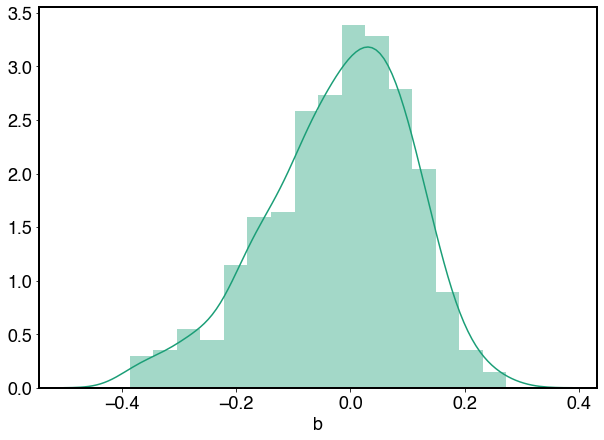

In [83]:
sns.distplot(df[df['x']=='LMNA']['b'])

# no PC

In [117]:
df_no_pc = pd.read_csv("../../result_files/lm/lm_sklearn_protein_drug_no_pc.csv.gz")

In [130]:
df_no_pc['drug_id'] = df_no_pc['y'].map(lambda x:int(x.split(';')[0]))

In [131]:
df_no_pc = df_no_pc[df_no_pc['drug_id'].isin(drug_list)]

In [123]:
df_no_pc_sig = df_no_pc[df_no_pc['fdr'] < 0.001]

In [124]:
df_no_pc_sig[df_no_pc_sig['y'].str.startswith('1029')]['x'].unique().size

292

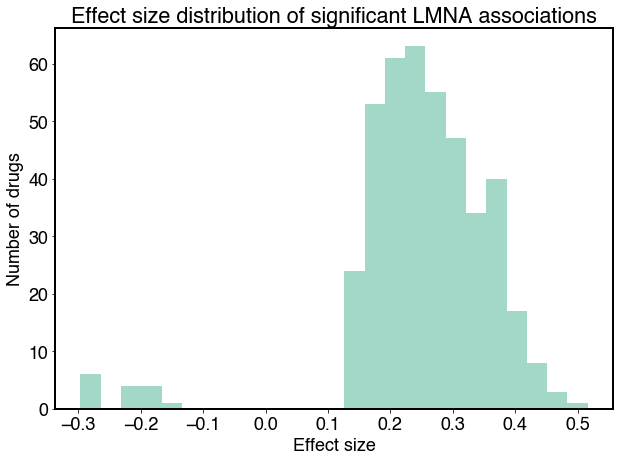

In [141]:
sns.distplot(df_no_pc_sig[df_no_pc_sig['x']=='LMNA']['b'], kde=False)
plt.title("Effect size distribution of significant LMNA associations")
plt.xlabel("Effect size")
plt.ylabel("Number of drugs")
plt.savefig("../../plots/Fig4S-E.pdf")

In [126]:
df_no_pc[(df_no_pc['y'].str.startswith('1029'))&(df_no_pc['x']=='HMGN2')]

,y,x,n,b,lr,covs,pval,fdr
2194958,1029;Motesanib;GDSC1,HMGN2,875,0.015397,0.192376,32,0.660946,0.660946
2438867,1029;Motesanib;GDSC2,HMGN2,555,0.008883,0.052074,32,0.819492,0.917831


In [112]:
df_no_pc[df_no_pc['y'].str.startswith('1029')].head(50)

,y,x,n,b,lr,covs,pval,fdr,drug_id
1306,1029;Motesanib;GDSC2,LMNA,598,0.372066,55.307595,32,1.030695e-13,6.699521e-13,1029
5399,1029;Motesanib;GDSC2,MESD,596,0.248020,41.673143,32,1.078808e-10,8.014000e-10,1029
8050,1029;Motesanib;GDSC2,LAMTOR1,598,0.225221,37.964071,32,7.205948e-10,2.341933e-09,1029
8520,1029;Motesanib;GDSC2,VAPB,597,0.289001,37.423923,32,9.504906e-10,6.178189e-09,1029
8566,1029;Motesanib;GDSC2,STIM1,554,0.233276,37.363435,31,9.804318e-10,9.242494e-09,1029
10079,1029;Motesanib;GDSC2,LNPK,586,0.237466,35.896987,31,2.080302e-09,1.352196e-08,1029
10529,1029;Motesanib;GDSC2,MRPS36,490,0.240658,35.487707,32,2.566652e-09,1.026661e-08,1029
11064,1029;Motesanib;GDSC2,HIBADH,583,0.250899,35.036546,32,3.235749e-09,9.347719e-09,1029
12156,1029;Motesanib;GDSC2,PGRMC2,598,0.236501,34.199729,32,4.973588e-09,9.236663e-09,1029
12244,1029;Motesanib;GDSC2,REEP5,592,0.237779,34.123830,32,5.171406e-09,5.378263e-08,1029


# RNA

In [16]:
df_degr = pd.read_csv("../../result_files/lm/lm_sklearn_degr_drug.csv.gz")

In [17]:
df_degr.head(20)

,y,x,n,b,lr,covs,pval,fdr
0,1047;Nutlin-3a (-);GDSC2,REXO4,857,0.281455,110.676217,30,6.966887e-26,1.393377e-25
1,1960;SYK_9721;GDSC2,SF3A2,710,-0.285219,100.724902,30,1.056885e-23,3.382030e-22
2,1034;Staurosporine;GDSC2,SSR4,953,-0.285772,90.295553,30,2.051131e-21,2.051131e-21
3,1079;Dasatinib;GDSC2,TOR1AIP2,707,-0.348341,87.964506,30,6.663959e-21,6.663959e-21
4,1047;Nutlin-3a (-);GDSC1,REXO4,828,0.310715,81.597647,30,1.668126e-19,3.336253e-19
5,1960;SYK_9721;GDSC2,SNRPB2,728,-0.253315,79.212451,30,5.577745e-19,1.784878e-17
6,1034;Staurosporine;GDSC2,P4HA2,821,-0.270821,70.567311,30,4.448271e-17,4.448271e-17
7,1079;Dasatinib;GDSC2,NUP155,948,-0.280860,69.297605,30,8.467234e-17,8.467234e-17
8,1034;Staurosporine;GDSC2,RRBP1,953,-0.377662,68.925886,30,1.022341e-16,1.022341e-16
9,1990;BCL6_7224;GDSC2,SF3A2,710,-0.212445,68.594898,30,1.209166e-16,1.934665e-15


In [23]:
df_degr[df_degr['x']=='VTN'].head(20)

,y,x,n,b,lr,covs,pval,fdr
28,1006;Cytarabine;GDSC1,VTN,806,0.264411,56.712406,30,5.044431e-14,5.044431e-14
30,1386;Doxorubicin;GDSC1,VTN,801,0.248341,56.585561,30,5.380547e-14,5.380547e-14
40,1459;PARP_0108;GDSC1,VTN,797,0.236905,53.968259,30,2.037547e-13,2.037547e-13
87,1460;PARP_9482;GDSC1,VTN,794,0.228543,47.240817,30,6.277942e-12,6.277942e-12
124,1393;Gemcitabine;GDSC1,VTN,799,0.219290,42.710536,30,6.346952e-11,6.346952e-11
191,1374;Dabrafenib (1373) + Trametinib (1372);GDSC1,VTN,733,0.223233,39.474134,30,3.324337e-10,3.324337e-10
296,1054;Palbociclib;GDSC1,VTN,771,0.221498,36.331703,30,1.664344e-09,1.664344e-09
354,1392;Bleomycin (10 uM);GDSC1,VTN,798,0.194828,34.947384,30,3.387363e-09,3.387363e-09
388,1011;Navitoclax;GDSC2,VTN,842,-0.192025,34.393986,30,4.501119e-09,4.501119e-09
410,2125;Mcl1_7350;GDSC2,VTN,643,-0.186247,34.080976,30,5.286560e-09,5.286560e-09


In [22]:
for x in df_degr.drop_duplicates('x').head(100)['x']:
    print(x)

REXO4
SF3A2
SSR4
TOR1AIP2
SNRPB2
P4HA2
NUP155
RRBP1
RAB1A
PLOD3
GNA11
NCLN
AP2B1
MPRIP
RBM8A
EMD
PVR
SMC3
PTPN1
RPN1
TP53
PDCD6
SMARCB1
VTN
MMUT
YBX1
HNRNPH1
CBR1
SNRPA
SPTLC1
SMC1A
CALD1
TFRC
UTRN
CAVIN1
ITGAV
TMEM43
PLOD1
LMNA
DLD
TMED1
PLEC
RAD21
DLST
BSG
CRTAP
SRPRB
AHNAK
PSIP1
NECTIN2
GNB2
PWP1
HSPA9
CSNK1A1
P4HA1
GNG12
PEBP1
TOP2A
AP2A1
FAM83H
JUP
SMARCE1
MYO1C
TES
NDUFS1
TOP2B
RBMX
EMC2
DAP3
KPNA2
RALYL
NUP153
PRPF19
P3H1
SUCLG1
CLPX
ESYT1
ADA
SPECC1
ESYT2
SLC25A24
GLUD1
RAB5A
CBX1
RBM39
MET
SMARCC1
MCCC2
DBT
SACM1L
ITGA3
SERPINH1
LAMC1
TMEM109
HMGN2
ACADM
GRPEL1
HADH
ACIN1
MLEC


In [29]:
df_degr[df_degr['y'].str.startswith('1029')].sort_values(by='fdr').head(10)

,y,x,n,b,lr,covs,pval,fdr
15408,1029;Motesanib;GDSC1,IGFBP5,61,-0.471017,15.567005,15,0.000080,0.000080
24335,1029;Motesanib;GDSC1,ZFYVE16,77,-0.564185,13.684123,21,0.000216,0.000216
26683,1029;Motesanib;GDSC1,PRNP,208,0.339932,13.308402,30,0.000264,0.000264
37720,1029;Motesanib;GDSC1,KIF5C,82,0.465902,11.927065,18,0.000553,0.000553
37908,1029;Motesanib;GDSC1,KIF13B,380,-0.195311,11.905867,30,0.000560,0.000560
47547,1029;Motesanib;GDSC1,DAB2,149,-0.303324,11.041028,28,0.000891,0.000891
58843,1029;Motesanib;GDSC1,DHX9,911,0.103729,10.247867,30,0.001368,0.001368
15972,1029;Motesanib;GDSC2,NDUFS1,589,0.110046,15.417243,30,0.000086,0.001494
14104,1029;Motesanib;GDSC2,NDUFV2,587,0.106655,15.942702,30,0.000065,0.001698
72838,1029;Motesanib;GDSC1,VCAM1,56,-0.596339,9.462403,22,0.002097,0.002097


In [37]:
df_degr[df_degr['fdr']<0.05].groupby(['x'])['fdr'].mean().sort_values().head(10)

x
BSG        0.009534
MRPL4      0.009763
VTN        0.009891
DLST       0.009963
RPL14      0.010301
LMNA       0.010310
ALDH4A1    0.010398
KPNA2      0.010507
RPL19      0.010813
HINT2      0.010836
Name: fdr, dtype: float64